#📌 Extracão

In [29]:
import pandas as pd
json_file_path = '/content/TelecomX_Data.json'
df = pd.read_json(json_file_path)
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [30]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Missing values per column:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [31]:
df_customer = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_customer], axis=1)
df.head()

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3


In [32]:
df_phone = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_phone], axis=1)

df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [33]:
print(df.describe())

       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [34]:
print("Distribuição da coluna 'Churn' (contagens):\n", df['Churn'].value_counts())
print("\nDistribuição da coluna 'Churn' (proporções):\n", df['Churn'].value_counts(normalize=True))

Distribuição da coluna 'Churn' (contagens):
 Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Distribuição da coluna 'Churn' (proporções):
 Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [35]:
print(df[df['Churn'] == ''])

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30    

#📊 Carga e análise

a contagem da coluna 'Churn mostrou 224 linhas sem dados válidos, agora precisamos tratar estes dados pois não temos como considerar dados vazios para fazer a análise.

In [36]:
df = df[df['Churn'] != '']
print("Distribuição da coluna 'Churn' (contagens) após limpeza:\n", df['Churn'].value_counts())
print("\nDistribuição da coluna 'Churn' (proporções) após limpeza:\n", df['Churn'].value_counts(normalize=True))

Distribuição da coluna 'Churn' (contagens) após limpeza:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribuição da coluna 'Churn' (proporções) após limpeza:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


contagem após a remoção de dados inválidos da coluna churn

Realizar uma análise exploratória das colunas que podem ser potenciais causas de evasão (ex: tipo de contrato, tempo de cliente, serviços contratados, cobranças mensais/totais). Visualizar a distribuição dessas colunas e sua relação com a coluna de evasão.

O primeiro passo é realizar a inspeção dos tipos de dados de todas as colunas para identificar se teve alguma coluna que não carregou corretamente.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

A cloluna 20 é um data type do tipo object, precisamos converter 'Charges.Total para tipo de dado numerico 'float' para vewrificar possíveis vazios e  strings 'NAN' e converte-las para numérico.

In [38]:
import numpy as np
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])
print(df['Charges.Total'].dtype)

float64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

Agora o 'Charges.Total é um dado do tipo numerico 'float'

In [40]:
print(df.describe())

       SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count    7043.000000  7043.000000      7043.000000    7032.000000
mean        0.162147    32.371149        64.761692    2283.300441
std         0.368612    24.559481        30.090047    2266.771362
min         0.000000     0.000000        18.250000      18.800000
25%         0.000000     9.000000        35.500000     401.450000
50%         0.000000    29.000000        70.350000    1397.475000
75%         0.000000    55.000000        89.850000    3794.737500
max         1.000000    72.000000       118.750000    8684.800000


irei agora iterar pelas colunas categóricas especificadas e exibir seus valores únicos e contagens de frequência usando .value_counts() para cada coluna.

In [41]:
Colunas_Categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

for col in Colunas_Categoricas:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts())
    print(f"\nProportions for column '{col}':")
    print(df[col].value_counts(normalize=True))


Value counts for column 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Proportions for column 'gender':
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Value counts for column 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Proportions for column 'Partner':
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Value counts for column 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Proportions for column 'Dependents':
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

Value counts for column 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Proportions for column 'PhoneService':
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

Value counts for column 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: i

Para visualizar a relação entre as colunas categóricas e a coluna "Churn" (Taxa de cancelamento), criarei gráficos de contagem para uma seleção de variáveis ​​categóricas relevantes, diferenciando-as pelo status de churn. Isso atende diretamente ao requisito de visualização da subtarefa.


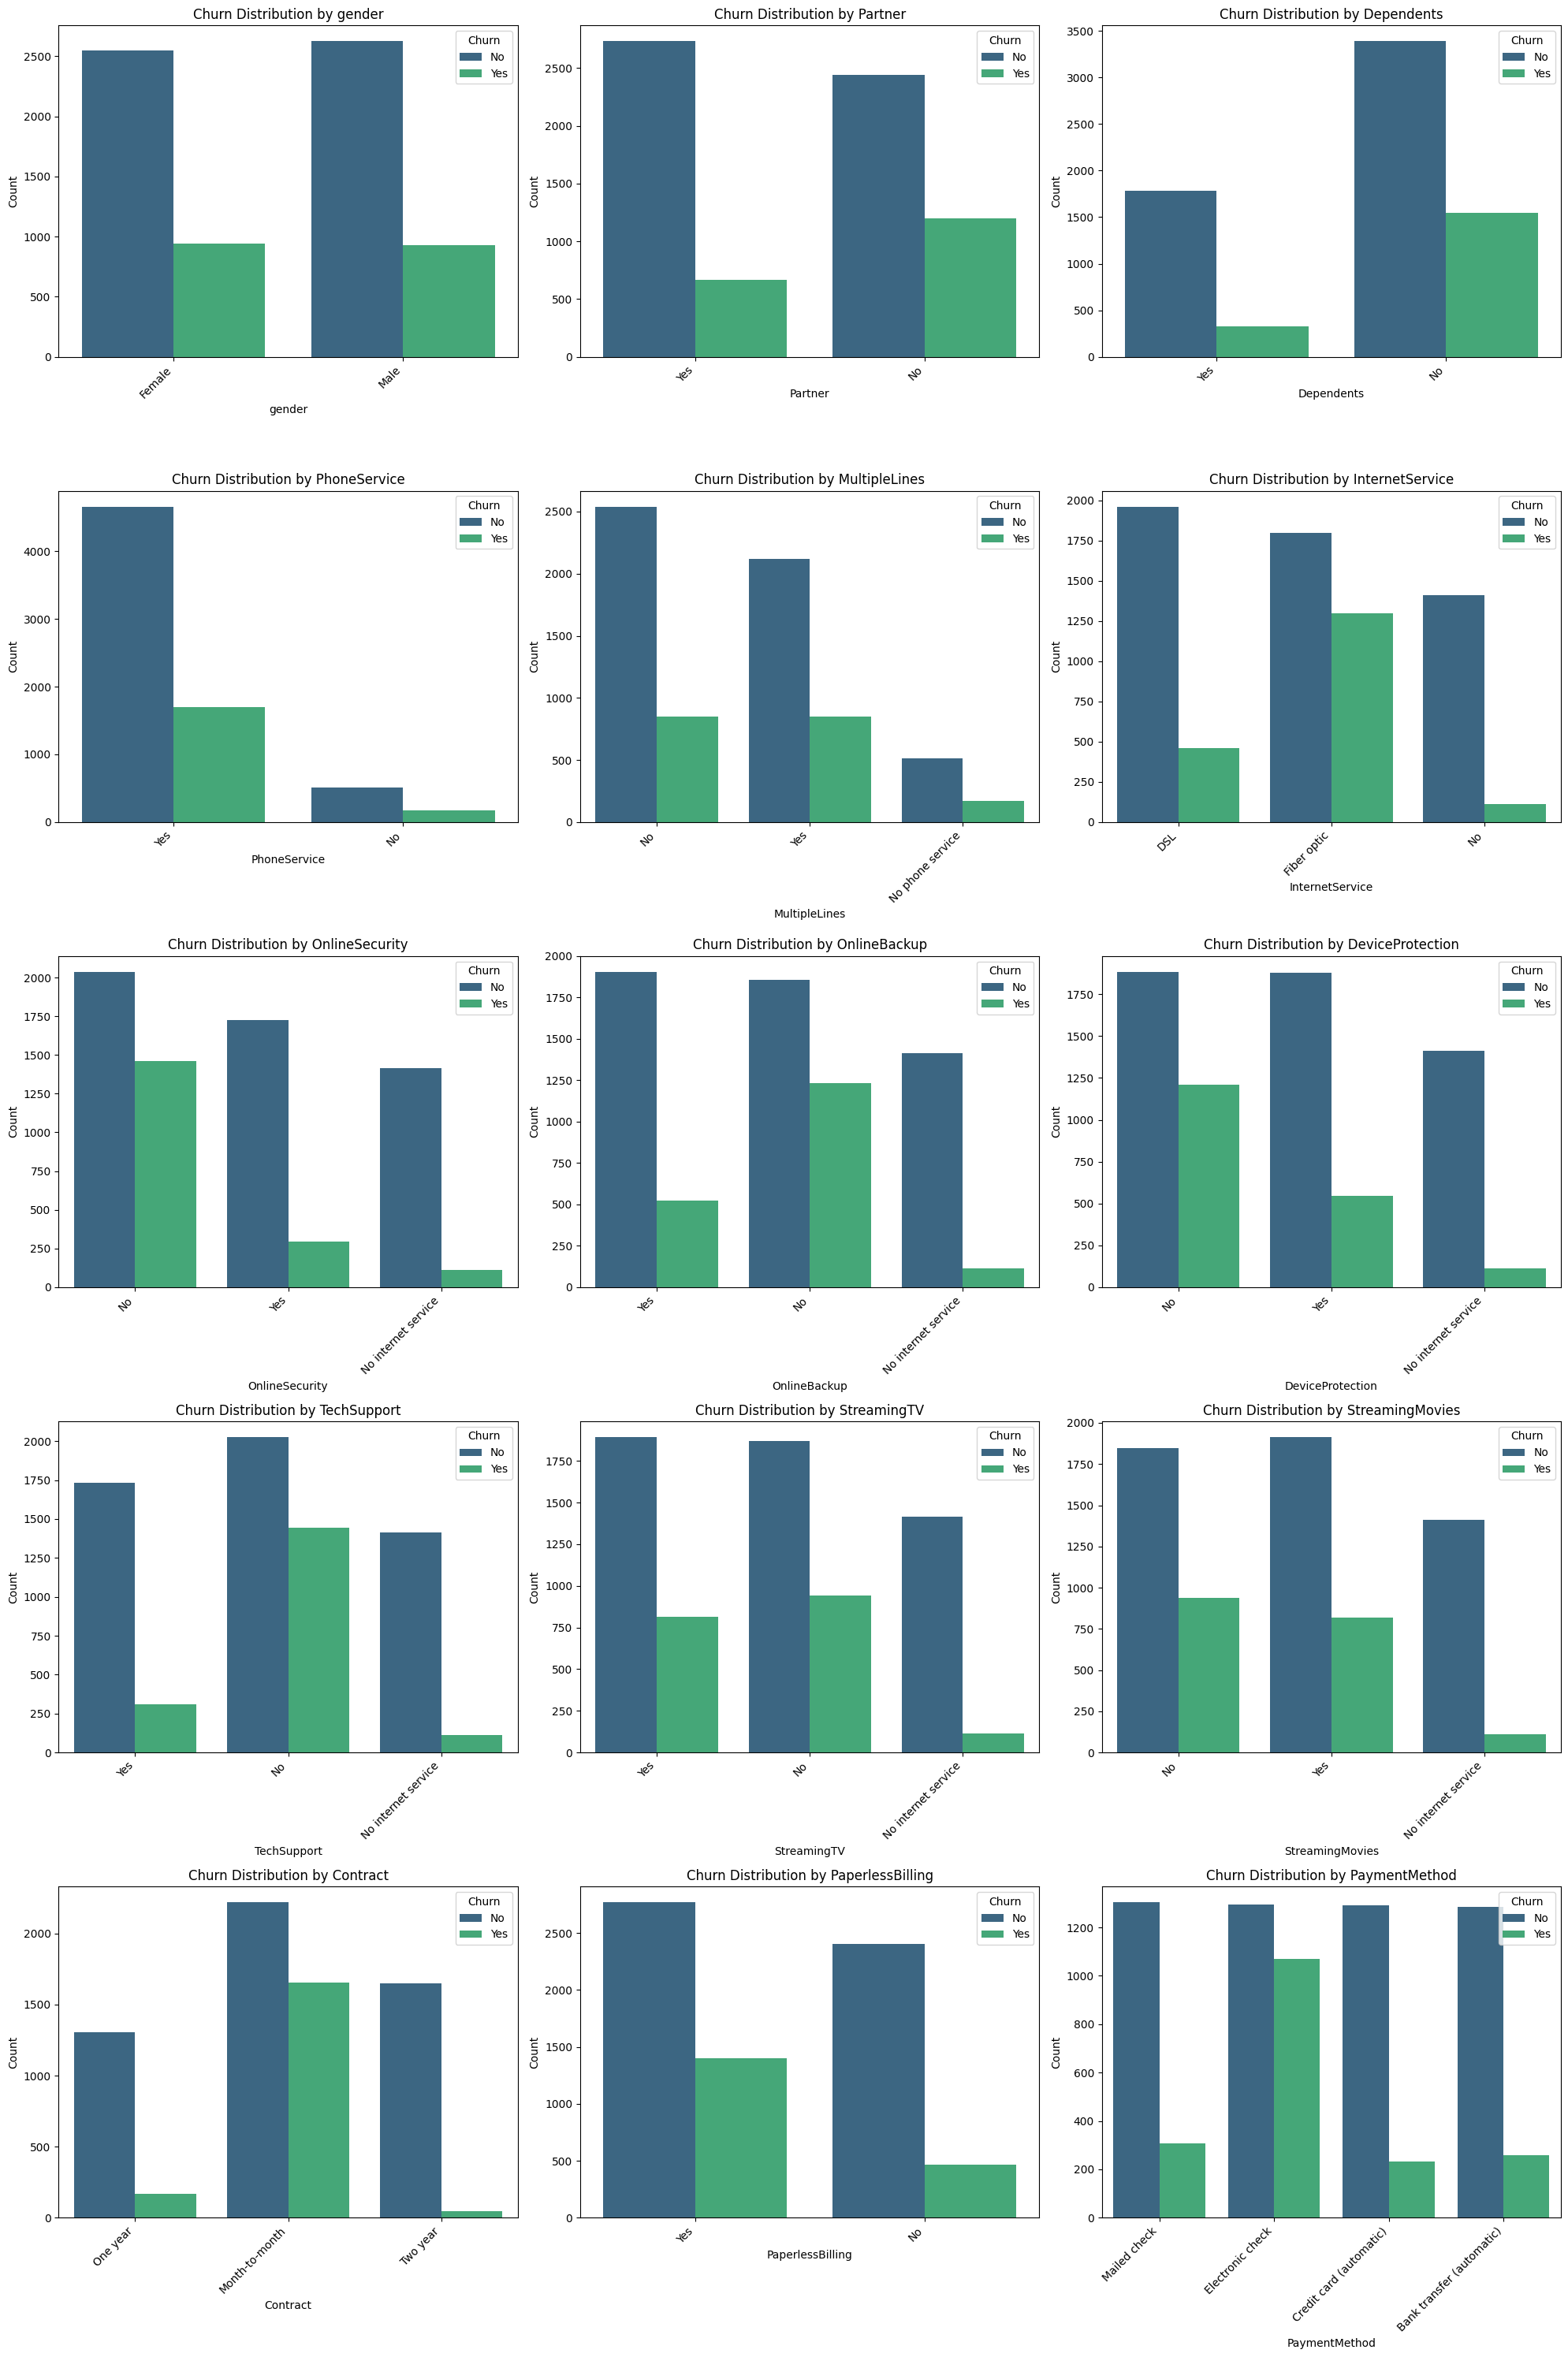

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))
for i, col in enumerate(Colunas_Categoricas):
    plt.subplot(5, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Para visualizar a distribuição das colunas numéricas e sua relação com a coluna 'Churn' (Taxa de Cancelamento), criarei gráficos de estimativa de densidade de kernel (KDE) para 'tempo de assinatura', 'Taxas Mensais' e 'Taxas Totais', diferenciando pelo status de churn. Isso atende diretamente ao requisito de visualização na subtarefa para recursos numéricos.

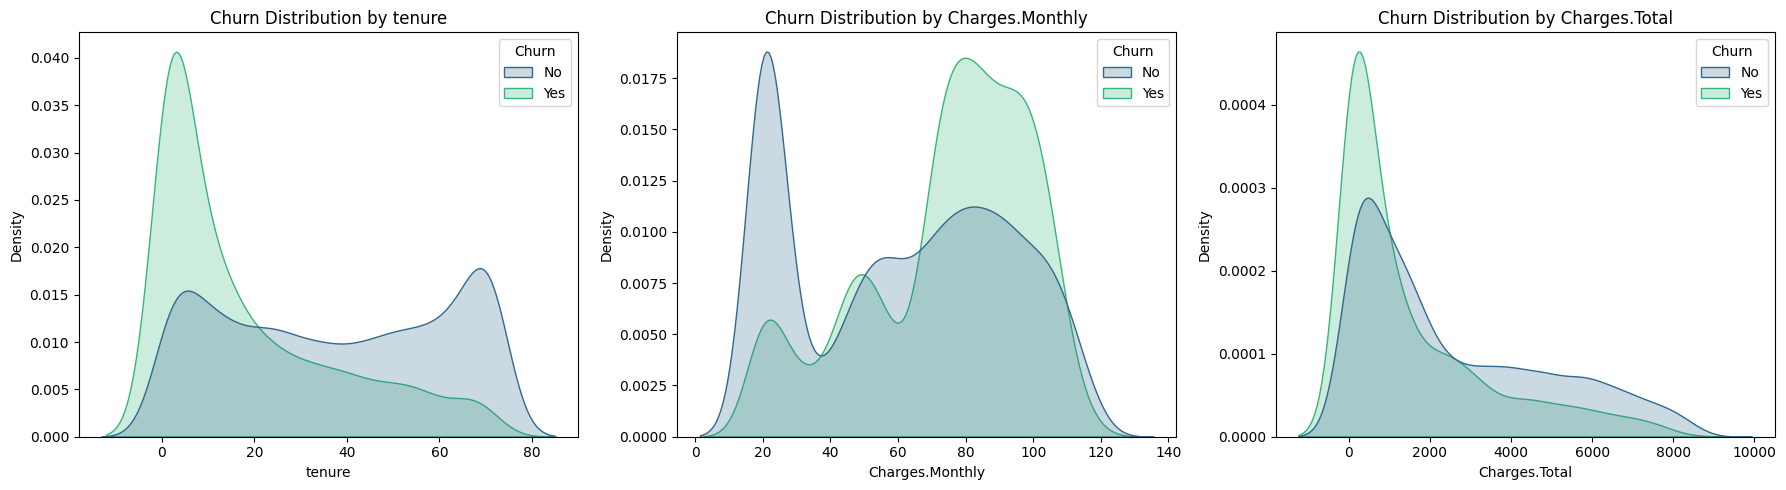

In [47]:
numerical_to_plot = ['tenure', 'Charges.Monthly', 'Charges.Total']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette='viridis', common_norm=False)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

#📄Relatorio Final

Principais Descobertas da Análise de Dados.

A estrutura inicial e os tipos de dados do DataFrame foram inspecionados com sucesso, e as colunas de dicionário aninhadas foram simplificadas.

Os valores ausentes foram verificados e as estatísticas descritivas básicas para as colunas numéricas foram exibidas.

A coluna 'Churn' foi identificada, sua distribuição analisada e os valores de string vazios dentro desta coluna foram tratados adequadamente.

Principais Correlações com o Churn a partir das Visualizações:
Forte Correlação Positiva: Contratos 'Mensais', serviço de internet 'Fibra óptica', método de pagamento 'Cheque eletrônico', 'Faturamento eletrônico' (Sim) e 'Cobranças mensais' mais altas mostram uma maior propensão ao churn.

Forte Correlação Negativa: Clientes com menor tempo de relacionamento, sem 'Parceiro' ou 'Dependentes' e aqueles que não possuem os serviços 'Segurança Online', 'Backup Online', 'Proteção de Dispositivo' ou 'Suporte Técnico' tendem a cancelar mais.

Menos impactantes: 'gênero', 'serviço de telefone', 'várias linhas', 'TV por streaming' e 'filmes por streaming' parecem ter correlações mais fracas com a taxa de cancelamento.

A análise teve como objetivo identificar as causas potenciais da perda de clientes. Os principais fatores associados a taxas de cancelamento mais altas incluem:

Menor tempo de permanência do cliente: Clientes que cancelaram o serviço têm um tempo médio de permanência de aproximadamente 18 meses, significativamente menor do que clientes que não cancelaram (cerca de 37 meses).

Mensalidades mais altas: Clientes que cancelaram o serviço tendem a ter mensalidades médias mais altas (aproximadamente US$ 74,44).

Em comparação com clientes que não cancelaram (cerca de US$ 61,35).

Tipos de serviço específicos: Clientes que utilizam internet de fibra óptica apresentam uma alta taxa de cancelamento, com 69,40% dos clientes que cancelaram utilizando esse serviço.

Falta de serviços adicionais de internet: A ausência de serviços como Segurança Online, Backup Online, Proteção de Dispositivos e Suporte Técnico está fortemente associada ao cancelamento (por exemplo, 78,17% dos clientes que cancelaram não possuem Segurança Online).

Tipo de contrato: Contratos mensais são muito comuns entre os clientes que cancelaram o serviço, representando 88,55% de todos os clientes que cancelaram.

Preferências de faturamento e pagamento: Clientes que optam por faturamento eletrônico e utilizam cheques eletrônicos como método de pagamento demonstram maior propensão ao cancelamento (74,91% dos clientes que cancelaram utilizam faturamento eletrônico e 57,30% utilizam cheques eletrônicos).
Dados demográficos: Clientes sem cônjuge ou dependentes são mais propensos ao cancelamento (64,21% dos clientes que cancelaram não possuem cônjuge ou dependente).

Principais Descobertas da Análise de Dados

O conjunto de dados contém estruturas JSON aninhadas, que foram simplificadas com sucesso para facilitar a análise.

Após a limpeza, a coluna Churn apresentou uma distribuição clara: 25,72% dos clientes cancelaram o serviço, enquanto 74,28% não cancelaram.

A análise de características numéricas por status de churn revelou:
Os clientes que cancelaram o serviço têm um tempo médio de permanência substancialmente menor (aproximadamente 18 meses) em comparação com os clientes que não cancelaram (aproximadamente 37 meses).

Os clientes que cancelaram o serviço apresentam cobranças mensais médias mais altas (aproximadamente US$ 74,44)

do que os clientes que não cancelaram (aproximadamente US$ 61,35).

A análise e visualização de características categóricas destacaram várias associações fortes com o churn:
Tipo de contrato: 88,55% dos clientes que cancelaram o serviço possuem contratos mensais, indicando um alto risco em contratos flexíveis.
Serviço de Internet: Usuários de internet de fibra óptica representam 69,40% dos clientes que cancelaram o serviço, sugerindo uma possível insatisfação com esse tipo de serviço.
Segurança online: Um número significativo de 78,17% dos clientes que cancelaram o serviço não possuem segurança online, o que indica que a falta de serviços de proteção é um fator determinante para o cancelamento.
Método de pagamento: Usuários de cheque eletrônico representam 57,30% dos clientes que cancelaram o serviço, caracterizando-o como um método de pagamento de alto risco.
Fatura eletrônica: 74,91% dos clientes que cancelaram o serviço optaram pela fatura eletrônica, sugerindo uma possível correlação com clientes mais engajados digitalmente, porém talvez menos fiéis.

Insights ou Próximos Passos

Programas de Retenção Direcionados: Concentre os esforços de retenção em clientes mais recentes (menor tempo de permanência), aqueles com contratos mensais, usuários de internet de fibra óptica e aqueles que pagam por cheque eletrônico, pois esses grupos apresentam uma propensão significativamente maior a cancelar o serviço.

Investigar a Satisfação com o Serviço: Analise mais detalhadamente os motivos específicos para o alto índice de cancelamento entre usuários de internet de fibra óptica e aqueles que não possuem recursos de segurança na internet. Isso pode envolver pesquisas de feedback do cliente ou uma análise mais aprofundada da confiabilidade e do suporte do serviço para esses segmentos.
